In [1]:
!pip install stim~=1.12
!pip install numpy
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.0 MB/s eta 0:00:00


In [2]:
!pip install pymatching~=2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 7.0 MB/s eta 0:00:00


In [3]:
!pip install sinter~=1.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sinter: filename=sinter-1.13.0-py3-none-any.whl size=174168 sha256=c448fe3ce751dfebefd123c485a0138ea0b70702b5ba47303cca2bd917ebe29a
  Stored in directory: /root/.cache/pip/wheels/3a/36/ab/8370a985fec35408e65fe5e7864b0d570be74957dd063a4e75
Successfully built sinter


In [5]:
import matplotlib.pyplot as plt
import pymatching
import sinter
from typing import List
import scipy.stats
import numpy as np
import stim
print(stim.__version__)

1.13.0


In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=0,
            before_measure_flip_probability=0,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.014,0.019]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

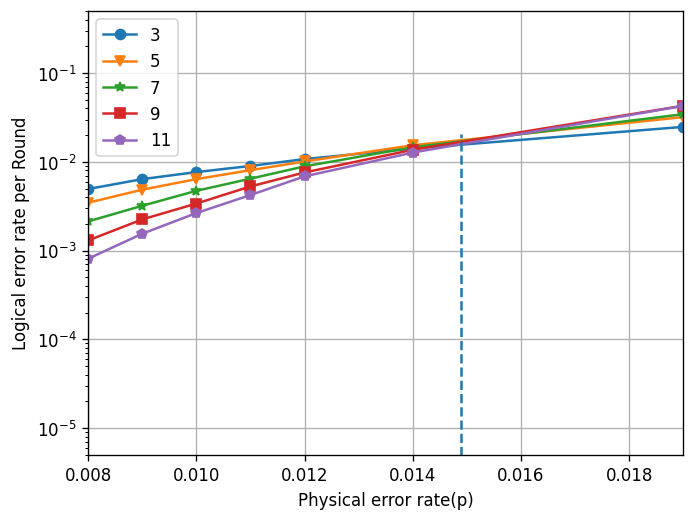

In [ ]:
x = np.linspace(5e-8,2.05e-2)
y = [0.0149 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-6, 5e-1)
ax.set_xlim(0.008, 0.019)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=0,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=0,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [0.14, 0.17, 0.19, 0.21, 0.22, 0.24, 0.27, 0.31]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=False,
)

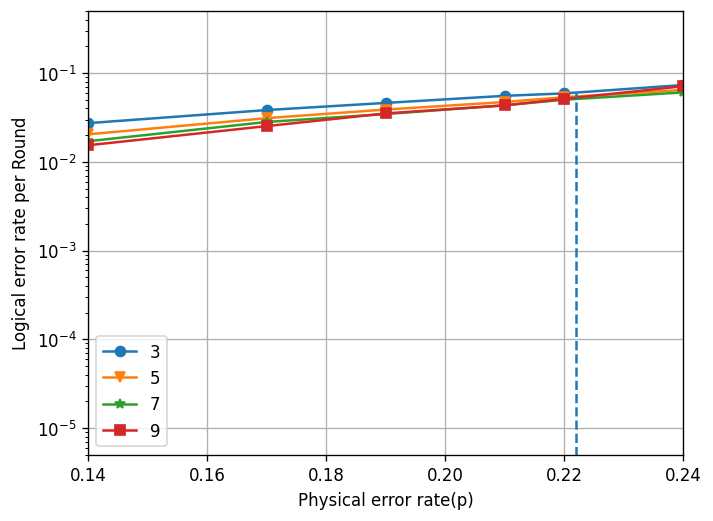

In [ ]:
x = np.linspace(5e-8,6e-2)
y = [0.222 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-6, 5e-1)
ax.set_xlim(0.14, 0.24)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=0,
            after_reset_flip_probability=0,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9]
    for noise in [ 0.1, 0.11, 0.12,0.14,0.19, 0.21, 0.23, 0.25, 0.29, 0.33]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=False,
)

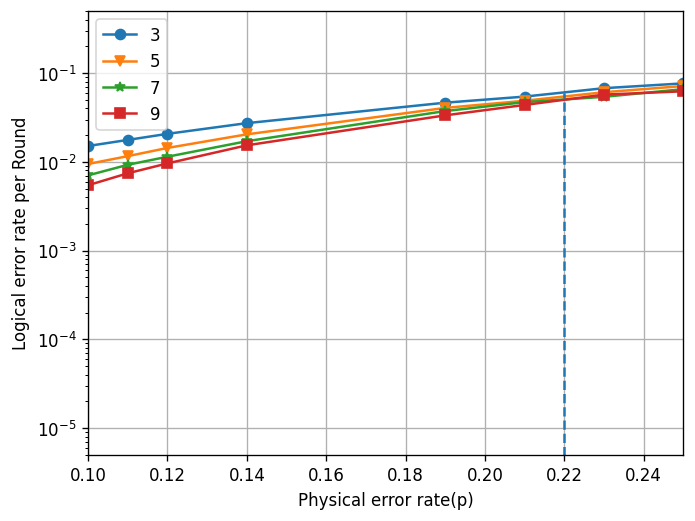

In [ ]:
x = np.linspace(5e-8,6e-2)
y = [0.22 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-6, 5e-1)
ax.set_xlim(0.1, 0.25)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=0,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.014,0.019]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

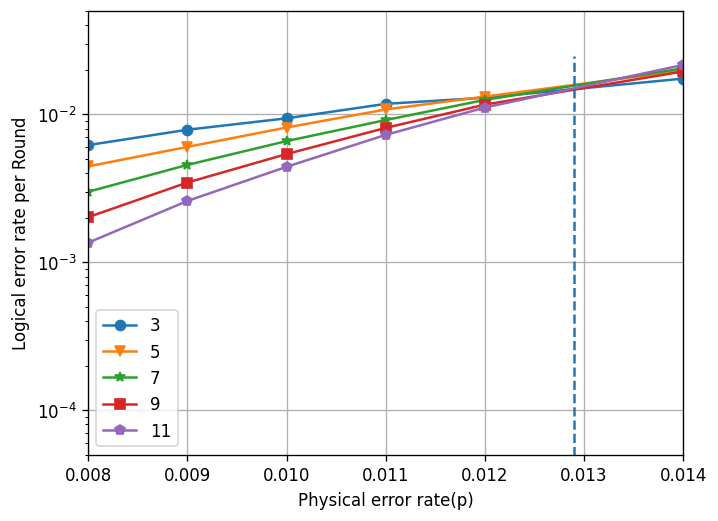

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.0129 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.014)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=0,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.014,0.019]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

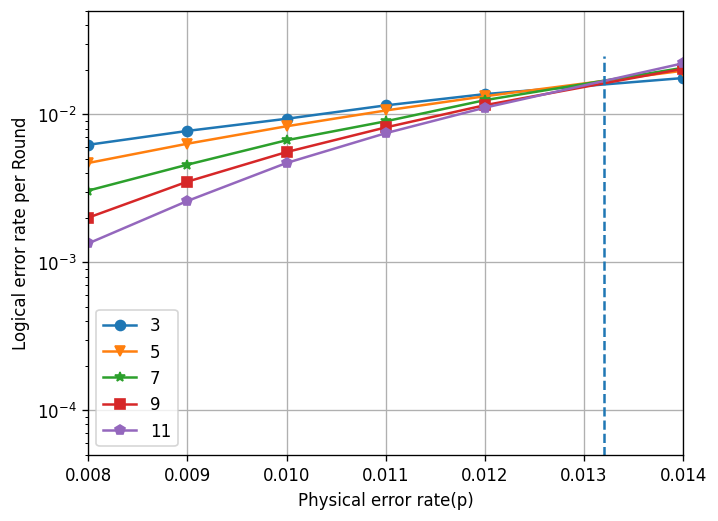

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.0132 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.014)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=0,
            before_measure_flip_probability=0,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.014,0.019]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

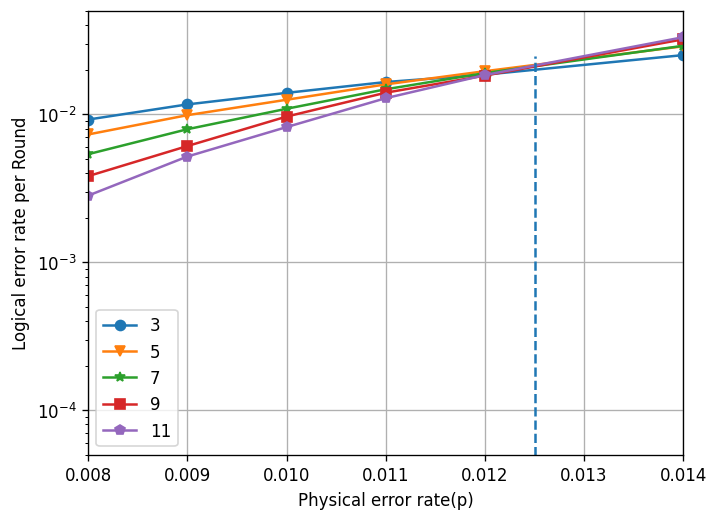

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.0125 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.014)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=0,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.014,0.019]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

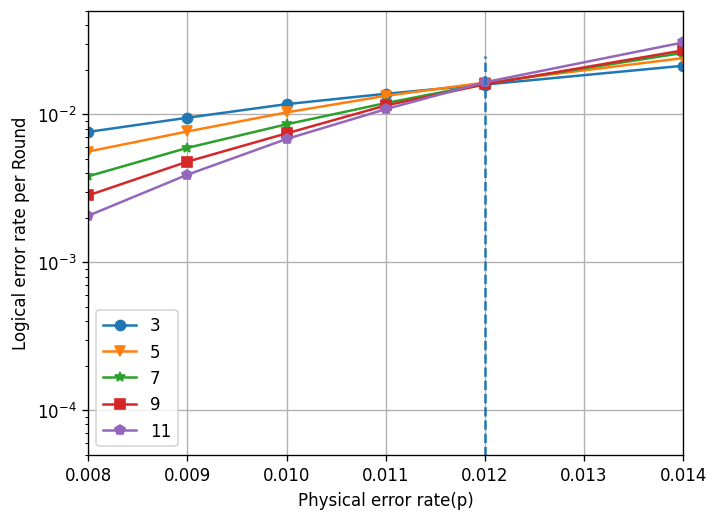

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.012 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.014)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=0,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012, 0.014]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

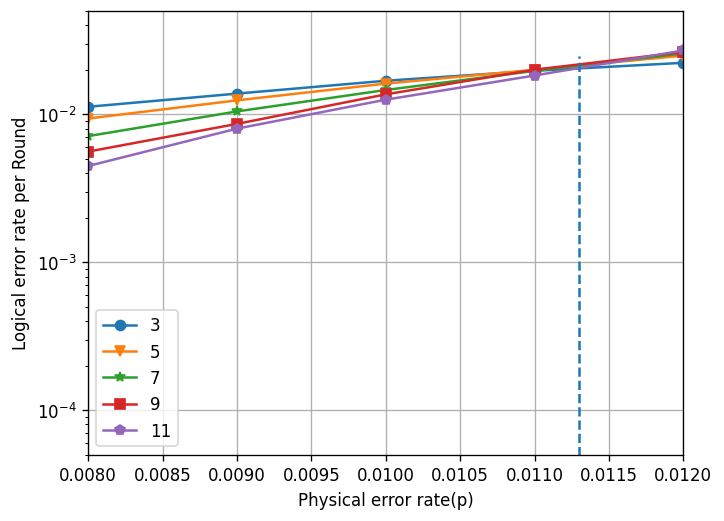

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.0113 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.012)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=0,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012, 0.014]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

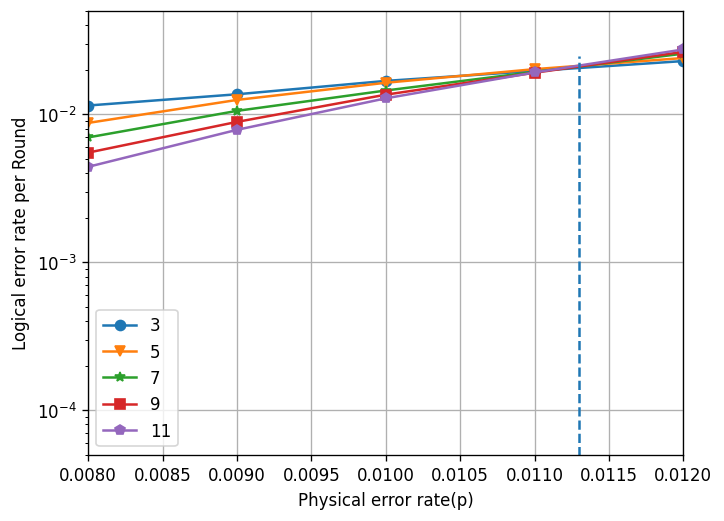

In [ ]:
x = np.linspace(5e-8,2.5e-2)
y = [0.0113 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-5, 5e-2)
ax.set_xlim(0.008, 0.012)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [ ]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=5_000,
    print_progress=False,
)

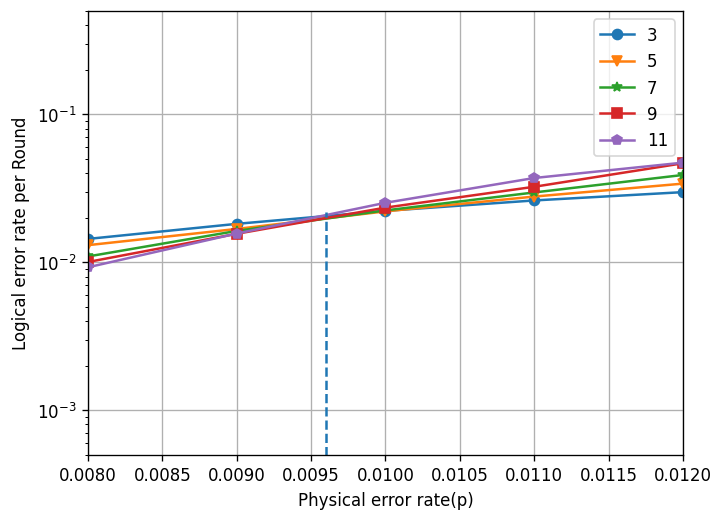

In [ ]:
x = np.linspace(5e-8,2.2e-2)
y = [0.0096 for i in x]
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
    highlight_max_likelihood_factor =1,
    # line_fits = True
)
ax.plot(y,x,'--')
ax.set_ylim(5e-4, 5e-1)
ax.set_xlim(0.008, 0.012)
ax.semilogy()
ax.set_xlabel("Physical error rate(p)")
ax.set_ylabel("Logical error rate per Round")
ax.grid()
ax.legend()
fig.set_dpi(120)

In [6]:
noise = 8e-3

surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11, 13, 15, 17, 19, 20]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=100,
    print_progress=False,
)

In [7]:
# Compute the line fit.
xs = []
ys = []
log_ys = []
for stats in collected_surface_code_stats:
    d = stats.json_metadata['d']
    if not stats.errors:
        print(f"Didn't see any errors for d={d}")
        continue
    per_shot = stats.errors / stats.shots
    per_round = sinter.shot_error_rate_to_piece_error_rate(per_shot, pieces=stats.json_metadata['r'])
    xs.append(d)
    ys.append(per_round)
    log_ys.append(np.log(per_round))
fit = scipy.stats.linregress(xs, log_ys)
print(fit)

LinregressResult(slope=-0.08472938325051733, intercept=-4.075840530887644, rvalue=-0.9734555302042894, pvalue=2.1036468223863003e-06, stderr=0.00704325860858034, intercept_stderr=0.09261282490534056)


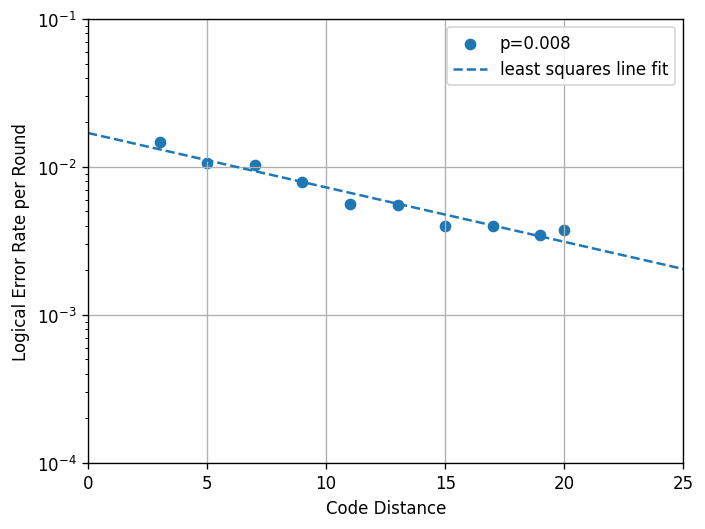

In [8]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, label=f"p={noise}")
ax.plot([0, 25],
        [np.exp(fit.intercept), np.exp(fit.intercept + fit.slope * 25)],
        linestyle='--',
        label='least squares line fit')
ax.set_ylim(1e-4, 1e-1)
ax.set_xlim(0, 25)
ax.semilogy()
# ax.set_title("Projecting distance needed to survive a trillion rounds")
ax.set_xlabel("Code Distance")
ax.set_ylabel("Logical Error Rate per Round")
plt.grid()
ax.legend()
fig.set_dpi(120)